# Harvard USPTO Patent Dataset (HUPD)

## Exploring the Dataset

In this tutorial, we use the bibliographic metadata of the HUPD to obtain some of its descriptive statistics. 

In [2]:
## Import relevant libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Data Frame

First thing first: Let's use `pd.read_feather` to load the bibliographic metadata.

In [6]:
# Specify the metadata path
_METADATA_PATH = "./mnt/data/HUPD/metadata-2021-02-10.feather"
# Read the feather
df = pd.read_feather(_METADATA_PATH)

We can see how the dataframe looks like.

In [7]:
# Display the pandas dataframe
df

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,old_uspc_subclass,examiner_id,examiner_name_last,examiner_name_first,examiner_name_middle,old_status,patent_year,status,decision,foreign
0,10000645,2001-11-15,Utility,"ELISCA, PIERRE E",3621,705,057000,9500.0,4208-4051,Patented Case,...,057000,99434.0,ELISCA,PIERRE,E,ACCEPTED,2004,PENDING,PENDING,0
1,10000771,2001-10-31,Utility,"DOVE, TRACY MAE",1795,429,013000,8132.0,PUG.0065US,Abandoned -- Failure to Pay Issue Fee,...,013000,67580.0,DOVE,TRACY,MAE,REJECTED,2010,REJECTED,REJECTED,0
2,10000973,2001-10-30,Utility,"SCHAETZLE, KENNEDY",3766,607,017000,1868.0,P-9572.00,Abandoned -- Failure to Respond to an Office A...,...,017000,92488.0,SCHAETZLE,KENNEDY,None,REJECTED,2005,REJECTED,REJECTED,0
3,10000997,2001-11-30,Utility,"FREDMAN, JEFFREY NORMAN",1637,536,023100,4960.0,D1550-1US,Patented Case,...,023100,88290.0,FREDMAN,JEFFREY,NORMAN,ACCEPTED,2006,ACCEPTED,ACCEPTED,0
4,10001095,2001-11-15,Utility,"LIN, SHEW FEN",2166,707,102000,9485.0,SBL0011US,Patented Case,...,102000,98557.0,LIN,SHEW FEN,None,ACCEPTED,2007,ACCEPTED,ACCEPTED,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572533,16062170,2018-06-14,Utility,"JOHNSON, STEPHEN",3641,102.0,202120,5068.0,8952-000475-US-NP,Patented Case,...,None,NaN,None,None,None,PENDING,2018,ACCEPTED,ACCEPTED,1
4572534,16062262,2018-06-14,Utility,"LACHICA, ERICSON M",1792,426.0,115000,8265.0,7066-X18-099,Non Final Action Mailed,...,None,NaN,None,None,None,PENDING,2018,PENDING,PENDING,1
4572535,16062675,2018-06-15,Utility,"VERLEY, NICOLE T",3618,280.0,730200,9465.0,8952-000477-US-NP,Response after Final Action Forwarded to Examiner,...,None,NaN,None,None,None,PENDING,2018,ACCEPTED,ACCEPTED,1
4572536,16062981,2018-06-15,Utility,"JAVANMARD, SAHAR",1627,514.0,560000,2734.0,SCIAD-34717.252,Non Final Action Mailed,...,None,NaN,None,None,None,PENDING,2018,ACCEPTED,ACCEPTED,1


In [13]:
df["decision"].unique()

array(['PENDING', 'REJECTED', 'ACCEPTED', 'CONT-ACCEPTED', 'CONT-PENDING',
       'CONT-REJECTED'], dtype=object)

In [10]:
sample_df = df.loc[df["application_number"].isin([
  "10465416",
  "10488451",
  "10488662",
  "10494861",
  "10499494",
  "10505992",
  "10519008",
  "10519960",
  "10536974",
  "10545356",
  ])].reset_index().drop(columns=["index"])
sample_df

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,old_uspc_subclass,examiner_id,examiner_name_last,examiner_name_first,examiner_name_middle,old_status,patent_year,status,decision,foreign
0,10465416,2003-06-18,Utility,"KOSLOW, CAROL M",1755,106,035000,5024.0,95656,Patented Case,...,035000,95539.0,KOSLOW,CAROL,M,ACCEPTED,2005,CONT-ACCEPTED,CONT-ACCEPTED,0
1,10488451,2004-03-03,Utility,"BETTON, TIMOTHY E",1617,424,489000,3724.0,20967 US C038435/0175484,Abandoned -- Failure to Respond to an Office A...,...,489000,59706.0,BETTON,TIMOTHY,E,REJECTED,2004,REJECTED,REJECTED,1
2,10488662,2004-03-04,Utility,"RUSSEL, JEFFREY E",1654,514,012000,6416.0,MER-127,Abandoned -- Failure to Respond to an Office A...,...,012000,73069.0,RUSSEL,JEFFREY,E,REJECTED,2005,REJECTED,REJECTED,1
3,10494861,2004-10-07,Utility,"SIMONE, TIMOTHY F",1761,99.0,453000,8787.0,015090US1,Patented Case,...,453000,61615.0,SIMONE,TIMOTHY,F,ACCEPTED,2005,ACCEPTED,ACCEPTED,1
4,10499494,2004-07-19,Utility,"PILKINGTON, JAMES",3682,74.0,422000,9267.0,F-8292,Patent Expired Due to NonPayment of Maintenanc...,...,422000,76523.0,PILKINGTON,JAMES,None,ACCEPTED,2005,ACCEPTED,ACCEPTED,1
5,10505992,2004-10-07,Utility,"KASTLER, SCOTT R",1793,266.0,135000,3555.0,04571/HG,Patent Expired Due to NonPayment of Maintenanc...,...,135000,65269.0,KASTLER,SCOTT,R,ACCEPTED,2005,ACCEPTED,ACCEPTED,1
6,10519008,2004-12-21,Utility,"ALSTRUM ACEVEDO, JAMES HENRY",1616,514.0,179000,7228.0,019904-002210US,Patented Case,...,179000,66663.0,ALSTRUM ACEVEDO,JAMES,HENRY,ACCEPTED,2006,ACCEPTED,ACCEPTED,1
7,10519960,2005-08-30,Utility,"WOLFE JR, WILLIS RAY",3747,701.0,108000,5416.0,10537/286,Patent Expired Due to NonPayment of Maintenanc...,...,108000,57541.0,WOLFE JR,WILLIS,RAY,ACCEPTED,2005,PENDING,PENDING,1
8,10536974,2005-12-23,Utility,"NICOLAS, FREDERICK C",3754,222.0,399000,6214.0,6.70.1067 PCT/IB-US (LBT1,Patented Case,...,399000,99781.0,NICOLAS,FREDERICK,C,ACCEPTED,2006,PENDING,PENDING,1
9,10545356,2006-11-20,Utility,"THOMAS, TIMOTHY P",1628,514.0,450000,3312.0,nan,Patented Case,...,450000,66987.0,THOMAS,TIMOTHY,P,ACCEPTED,2007,ACCEPTED,ACCEPTED,1


In [11]:
sample_df.to_feather("sample_metadata.feather")

We can also display all the data fields within the dataframe.

In [7]:
# Let's look at the columns of the dataframe
df.columns

Index(['application_number', 'filing_date', 'application_invention_type',
       'examiner_full_name', 'examiner_art_unit', 'uspc_class',
       'uspc_subclass', 'confirm_number', 'atty_docket_number',
       'appl_status_desc', 'appl_status_date', 'file_location',
       'file_location_date', 'earliest_pgpub_number', 'earliest_pgpub_date',
       'wipo_pub_number', 'wipo_pub_date', 'patent_number',
       'patent_issue_date', 'invention_title', 'small_entity_indicator',
       'aia_first_to_file', 'publication_number', 'date_produced',
       'date_published', 'old_decision', 'old_title', 'main_cpc_label',
       'cpc_labels', 'main_ipcr_label', 'ipcr_labels', 'old_filing_date',
       'temp_patent_number', 'old_patent_issue_date', 'old_abandon_date',
       'title_uspto', 'old_uspc_class', 'old_uspc_subclass', 'examiner_id',
       'examiner_name_last', 'examiner_name_first', 'examiner_name_middle',
       'old_status', 'patent_year', 'status', 'decision', 'foreign'],
      dtype='ob

We can try to display all the patent applications that were filed to the USPTO in the year 2016. 

In [8]:
# Display all the USPTO patent applications that were filed in 2016 according to our metadata
df[df.filing_date.astype(str).str.startswith('2016')]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,old_uspc_subclass,examiner_id,examiner_name_last,examiner_name_first,examiner_name_middle,old_status,patent_year,status,decision,foreign
2237196,13144833,2016-01-22,Utility,"FUBARA, BLESSING M",1613,424,059000,9423.0,096115-0897066 (002510US),Abandoned -- Failure to Respond to an Office A...,...,059000,75390.0,FUBARA,BLESSING,M,REJECTED,2016,REJECTED,REJECTED,1
2339357,13261748,2016-01-20,Utility,"LEUNG, WAI LUN",2637,398.0,045000,5040.0,169273,Patented Case,...,045000,95191.0,LEUNG,WAI,LUN,ACCEPTED,2016,ACCEPTED,ACCEPTED,1
2448141,13383015,2016-02-01,Utility,"MICHENER, JOSHUA J",3635,052,282100,5412.0,0401-015,Patented Case,...,282100,92927.0,MICHENER,JOSHUA,J,ACCEPTED,2016,ACCEPTED,ACCEPTED,1
2562145,13510522,2016-02-03,Utility,"CHIN, HUI H",1762,524,318000,9378.0,20162.54USWO,Patented Case,...,318000,92253.0,CHIN,HUI,H,ACCEPTED,2012,ACCEPTED,ACCEPTED,1
2622093,13577188,2016-02-19,Utility,"TRISCHLER, JOHN T",2859,320,119000,6303.0,3C101-050US1,Patented Case,...,119000,94632.0,TRISCHLER,JOHN,T,ACCEPTED,2013,ACCEPTED,ACCEPTED,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351788,15530689,2016-03-31,Utility,"OLSHANNIKOV, ALEX",2142,715,763000,5508.0,JAMD1147919(P016),Non Final Action Mailed,...,763000,65672.0,OLSHANNIKOV,ALEX,None,PENDING,2018,ACCEPTED,ACCEPTED,0
4351789,15530690,2016-12-09,Utility,"WONG, YUEN H",3667,701,036000,8430.0,106389-4216,Patented Case,...,036000,97221.0,WONG,YUEN,H,PENDING,2018,PENDING,PENDING,0
4351791,15530698,2016-04-15,Utility,"YAARY, ERIC",1747,131,352000,5411.0,SWEDM.055AUS2,Abandoned -- Failure to Respond to an Office A...,...,352000,67695.0,YAARY,ERIC,None,PENDING,2018,REJECTED,REJECTED,0
4351799,15530795,2016-05-02,Utility,"PENG, CHARLIE YU",3649,116,02800R,3114.0,nan,Abandoned -- Failure to Respond to an Office A...,...,02800R,70437.0,PENG,CHARLIE,YU,PENDING,2017,REJECTED,REJECTED,0


## Statistics about the Decision Status Labels

We might be interested in learning about the distribution of the accepted and rejected patent applications in the dataset. To that end, let's look at the total number of accepted, rejected, pending, cont-accepted, cont-rejected, and cont-pending patent applications between 2004 and 2018.

In [9]:
# Let's look at the distribution of the decision status labels
status_stats = (df.status).value_counts().to_dict()
print(status_stats)

{'ACCEPTED': 1857090, 'REJECTED': 1092092, 'CONT-ACCEPTED': 656028, 'PENDING': 488920, 'CONT-REJECTED': 288709, 'CONT-PENDING': 189699}


In fact, we can plot these numbers in a nice way using `matplotlib`.

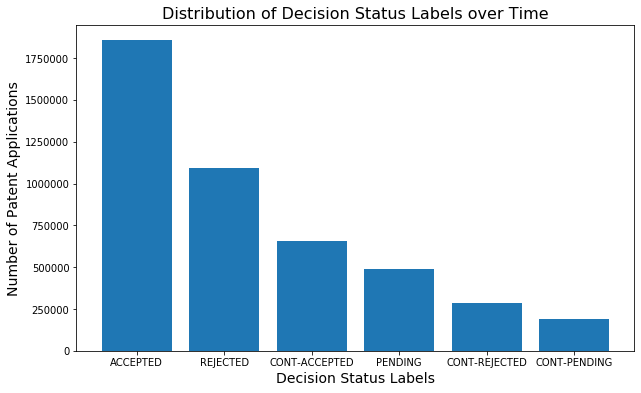

In [10]:
# Let's plot the numbers above
plt.figure(figsize=(10, 6))
plt.bar(range(len(status_stats)), list(status_stats.values()), align='center')
plt.xticks(range(len(status_stats)), list(status_stats.keys()))

# Specify the x-label, y-label, and title
plt.xlabel('Decision Status Labels', fontsize=14)
plt.ylabel('Number of Patent Applications', fontsize=14)
plt.title('Distribution of Decision Status Labels over Time', fontsize=16) 
plt.show()

## Statistics about the IPC/CPC Labels

How about the distribution of the IPC/CPC labels? 

In [11]:
# Let's restrict our attention to the IPC/CPC labels at the subclass level
df['cpc_sub'] = df.cpc_labels.str[:4]
df['ipc_sub'] = df.main_ipcr_label.str[:4]

In [12]:
# Unique IPCR subclass labels
print(f'# Unique IPCs: {len(df.ipc_sub.value_counts())}')
print(f'# Unique CPCs: {len(df.cpc_sub.value_counts())}')

# Unique IPCs: 638
# Unique CPCs: 627


Let's explore the distribution of IPC labels at the subclass level.

In [13]:
# Note that we also have some patent applications that do not contain IPC/CPC labels
df.ipc_sub.value_counts()

G06F    444122
        288832
H01L    236711
A61K    191050
H04L    144278
         ...  
C13C         1
F99Z         1
F24T         1
C06F         1
F24V         1
Name: ipc_sub, Length: 638, dtype: int64

Interesting... did you realize that the first column of the second row is empty? This implies that there are some patent applications that do not have any IPC labels.

### Creating the Two Plots in Figure 2 of the Paper (Distribution of Accepted Patent Applications from 2011 to 2016)

Let's now try to re-cerate the two plots in Figure 2.

In [14]:
# Import additional libraries and dependencies for some of the computations below
from __future__ import division
from itertools import *
from pylab import *

We restrict our attention to all the patent applications that were filed to the PTO between 2011 and 2016 (inclusive) and that contain the label "ACCEPTED" in their decision status field.

In [15]:
# Start and end dates (2011-2016)
start_date = '2011-01-01'
end_date = '2016-12-31'

# Filter the dataframe by the specific ranges
df_2011_2016 = df[df['filing_date'] >= start_date]
df_2011_2016 = df_2011_2016[df_2011_2016['filing_date'] <= end_date]

# Consider the patent applications that have the 'ACCEPTED' decision status label
accepted_df_2011_2016 = df_2011_2016[df_2011_2016.status == 'ACCEPTED']

In [16]:
# Accepted patent applications from 2011 to 2016 
accepted_df_2011_2016_ipc_sub = accepted_df_2011_2016.ipc_sub.value_counts().to_dict()

# For IPC
values = list(accepted_df_2011_2016_ipc_sub.values())
labels = list(accepted_df_2011_2016_ipc_sub.keys())

In [17]:
# We have one patent application that doesn't have an IPC subclass label in our restricted collection
for i, elt in enumerate(labels):
    if len(elt) != 4:
        print(values[i])

In [32]:
# Let's display this patent application which is missing its IPC subclass label
accepted_df_2011_2016[accepted_df_2011_2016.ipc_sub == '']

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,examiner_name_last,examiner_name_first,examiner_name_middle,old_status,patent_year,status,decision,foreign,cpc_sub,ipc_sub
26977,10510786,2012-02-06,Utility,"BILODEAU, DAVID",2648,455.0,063100,4317.0,2002P00270WOUS,Patent Expired Due to NonPayment of Maintenanc...,...,BILODEAU,DAVID,None,ACCEPTED,2005,ACCEPTED,ACCEPTED,1,,


In the upcoming parts, we focus only on the most popular 19 IPC sublcass codes.

In [19]:
# Let's get the names and values of those top 19 IPC subclass labels and aggregate all the remaining IPC codes under the name "Other Labels" 
_THRESHOLD = 19
new_values = values[:_THRESHOLD]
new_labels = labels[:_THRESHOLD]
new_values.append(np.sum(values[_THRESHOLD:]))
new_labels.append('Other Labels')

In [20]:
## Creating the pie char in Figure 2

# Now, let's plot the distribution of IPC categories of "accepted" patent applications from 2011 to 2016 (Figure 2 in the paper)
fig, ax = plt.subplots(figsize=(12, 12))

patches, texts, pcts = ax.pie(
    new_values, labels=new_labels, autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 1.5 else '',
    wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=60)
    
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=6)
ax.set_title('Distribution of IPC Categories from 2011 to 2016', fontsize=22)
plt.tight_layout()
plt.savefig('figures/ipc_distrib.png')


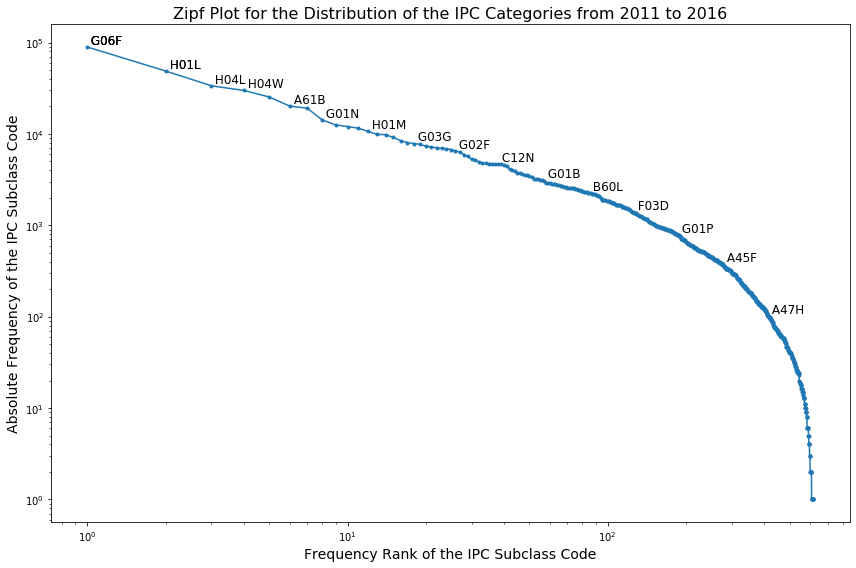

In [21]:
## Creating the Zipf plot in Figure 2 ##

# We can also create the Zipf plot on the left side of Figure 2
fig, ax = plt.subplots(figsize=(12, 8))
ranks = arange(1, len(values)+1)
loglog(ranks, values, marker=".")

ax.set_title('Zipf Plot for the Distribution of the IPC Categories from 2011 to 2016', fontsize=16)
ax.set_xlabel("Frequency Rank of the IPC Subclass Code", fontsize=14)
ax.set_ylabel("Absolute Frequency of the IPC Subclass Code", fontsize=14)
ax.grid(False)

for n in list(logspace(-0.5, log10(len(values)), 20).astype(int)):
    dummy = text(ranks[n], values[n], " " + labels[n], 
                 verticalalignment="bottom",
                 horizontalalignment="left", 
                 fontsize=12)

plt.tight_layout()
plt.savefig('figures/zipf_ipc_distrib.png')

## Statistics about the Patent Examiners

So far, we have looked at the decision status and IPC subclass label distributions, but we can also look at the acceptance ratio of examiners using HUPD. Let's now explore the behaviours of the patent examiners at the PTO.

In [22]:
# Get the names of 100 patent examiners who examined the most patent applications by number
top100_examiner_names = list((df.examiner_full_name.value_counts()[:100]).keys())

In [23]:
# Create a temporary dataframe
examiner_dec_df = pd.DataFrame()

# For each examiner in the list above, determine the decisions made by that examiner and add it to the temporary dataframe
for examiner_name in top100_examiner_names:
    decision_stat_dict = ((df[df['examiner_full_name'] == examiner_name])['decision'].value_counts()).to_dict()
    decision_stat_dict['examiner_full_name'] = examiner_name
    examiner_dec_df = examiner_dec_df.append(decision_stat_dict, ignore_index=True)


In [26]:
# Now let's look at that dataframe
examiner_dec_df

,ACCEPTED,CONT-ACCEPTED,CONT-PENDING,CONT-REJECTED,PENDING,REJECTED,examiner_full_name
0,1025.0,299.0,62.0,77.0,218.0,380.0,"ALI, MOHAMMAD M"
1,1069.0,302.0,84.0,61.0,240.0,281.0,"NGUYEN, HANH N"
2,1153.0,302.0,71.0,44.0,281.0,184.0,"PAUMEN, GARY F"
3,937.0,299.0,85.0,89.0,246.0,311.0,"KOSLOW, CAROL M"
4,1118.0,152.0,33.0,29.0,253.0,381.0,"PEDDER, DENNIS H"
...,...,...,...,...,...,...,...
95,820.0,260.0,71.0,26.0,210.0,71.0,"SOWARD, IDA M"
96,525.0,158.0,46.0,75.0,123.0,526.0,"LAVINDER, JACK W"
97,905.0,188.0,37.0,16.0,216.0,87.0,"HUYNH, HAI H"
98,595.0,223.0,55.0,78.0,182.0,315.0,"HWU, DAVIS D"


The following bar shows the acceptance rate of the top 100 patent examiners at the PTO. It is interesting to note that the average acceptance rate for these examiners is almost 50%.

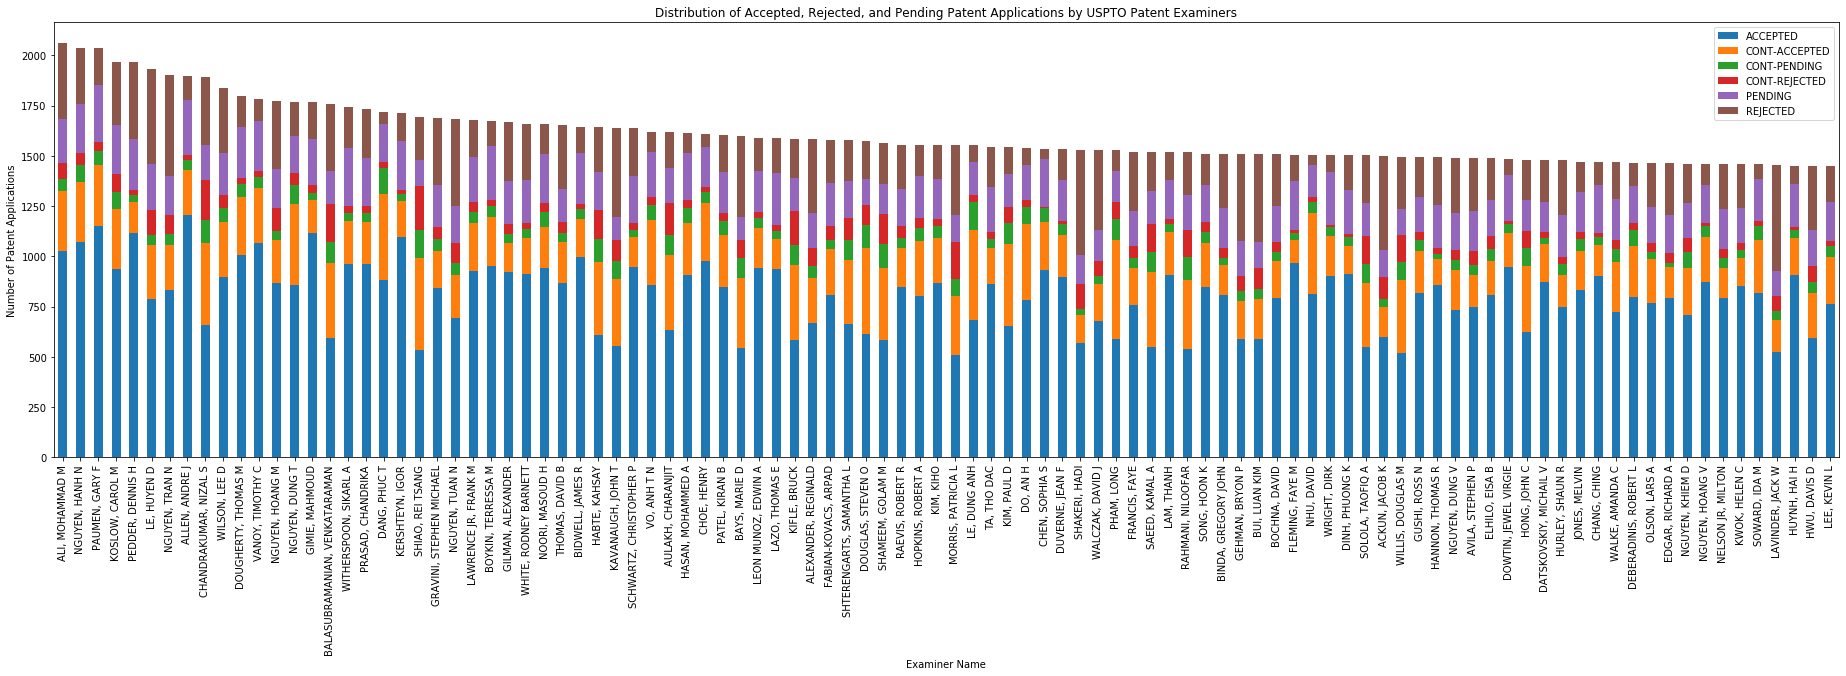

In [25]:
# Let's plot these numbers above in a nice bar plot
examiner_dec_df.plot.bar(stacked=True, x='examiner_full_name', figsize=(32, 8))
plt.title('Distribution of Accepted, Rejected, and Pending Patent Applications by USPTO Patent Examiners')
plt.xlabel('Examiner Name')
plt.ylabel('Number of Patent Applications')
plt.savefig('figures/basic_examiner_stats.png')